In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

from scipy.io import loadmat
from sklearn import svm

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

In [2]:
# functions

def plotData(X, y ,S):
    pos = (y == 1).ravel()
    neg = (y == 0).ravel()
    
    plt.scatter(X[pos,0], X[pos,1], s=S, c='b', marker='+', linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], s=S, c='r', marker='o', linewidths=1)
    
    
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
    plotData(X, y,6)
    #plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=mpl.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='y', marker='|', s=100, linewidths='5')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)  
    

Example 1: Linear SVM

In [4]:
data1 = loadmat('//home//khalid//pythonfiles//SVM//ex6data1.mat')
# print(data1)

X1 = data1['X']
y1 = data1['y']

print('X1:', X1.shape)
print('y1:', y1.shape)

X1: (51, 2)
y1: (51, 1)


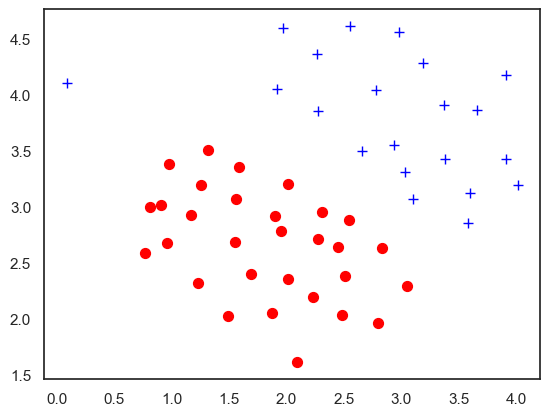

In [5]:
#data before classifying
plotData(X1,y1,50)

In [8]:
# small C == UF
clf = svm.SVC(C=1.0, kernel='linear') # svm.SVC class from sklearn
clf.fit(X1, y1.ravel())
#plot_svc(clf, X1, y1)


SVC(kernel='linear')

In [9]:
# big C == OF
clf.set_params(C=100)
clf.fit(X1, y1.ravel())
#plot_svc(clf, X1, y1)    
    

SVC(C=100, kernel='linear')

Example 2: NonLinear SVM

In [11]:
data2 = loadmat('//home//khalid//pythonfiles//SVM//ex6data2.mat')

#print(data2.keys())
y2 = data2['y']
X2 = data2['X']

print('X2:', X2.shape)
print('y2:', y2.shape)


X2: (863, 2)
y2: (863, 1)


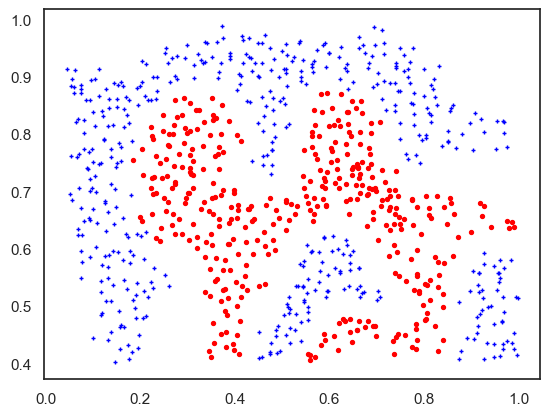

In [12]:
plotData(X2, y2,8) 

In [13]:
#apply SVM
clf2 = svm.SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2, y2.ravel())
# plot_svc(clf2, X2, y2)

SVC(C=50, gamma=6)

Example 3: NonLinear SVM

In [14]:
data3 = loadmat('//home//khalid//pythonfiles//SVM//ex6data3.mat')

# print(data3.keys())
y3 = data3['y']
X3 = data3['X']

print('X3:', X3.shape)
print('y3:', y3.shape)

X3: (211, 2)
y3: (211, 1)


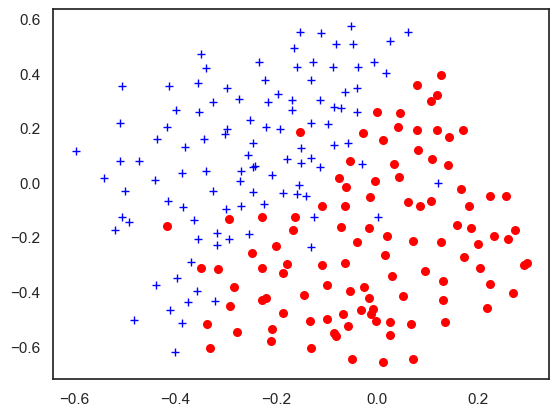

In [15]:
plotData(X3, y3,30)

In [16]:
clf3 = svm.SVC(C=1.0, kernel='poly', degree=3, gamma=10)
clf3.fit(X3, y3.ravel())
# plot_svc(clf3, X3, y3)

SVC(gamma=10, kernel='poly')

Spam email detection

In [17]:
# Training
spam_train = loadmat('//home//khalid//pythonfiles//SVM//spamTrain.mat')
spam_test = loadmat('//home//khalid//pythonfiles//SVM//spamTest.mat')

# print(spam_train)   
# print(spam_test)

In [18]:
X = spam_train['X']
Xtest = spam_test['Xtest']

y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

print(X.shape, y.shape, Xtest.shape, ytest.shape)

(4000, 1899) (4000,) (1000, 1899) (1000,)


In [19]:
svc = svm.SVC()
svc.fit(X, y)

SVC()

In [20]:
# Testing
print('Test accuracy = {0}%'.format(np.round(svc.score(Xtest, ytest) * 100, 2)))   

Test accuracy = 98.7%
